# **Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the file path
bank = '/content/drive/My Drive/bank.csv'

In [ ]:
data = pd.read_csv(bank, delimiter=';')

# **Data Analysis**

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
data.shape

(4521, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# **Visualize the data**

In [ ]:
data['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

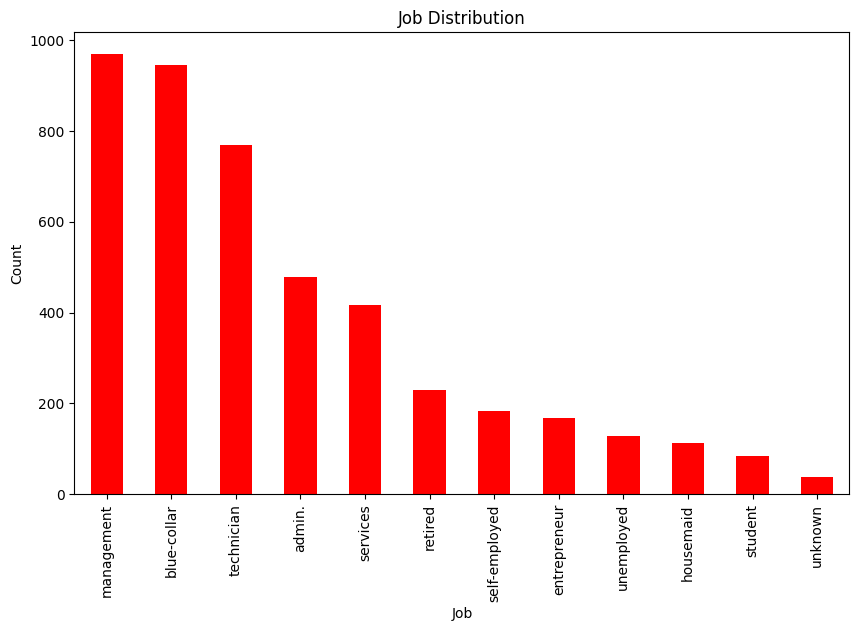

In [ ]:
plt.figure(figsize=(10, 6))
job_counts = data['job'].value_counts()
job_counts.plot(kind='bar', color='red')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Distribution')
plt.show()

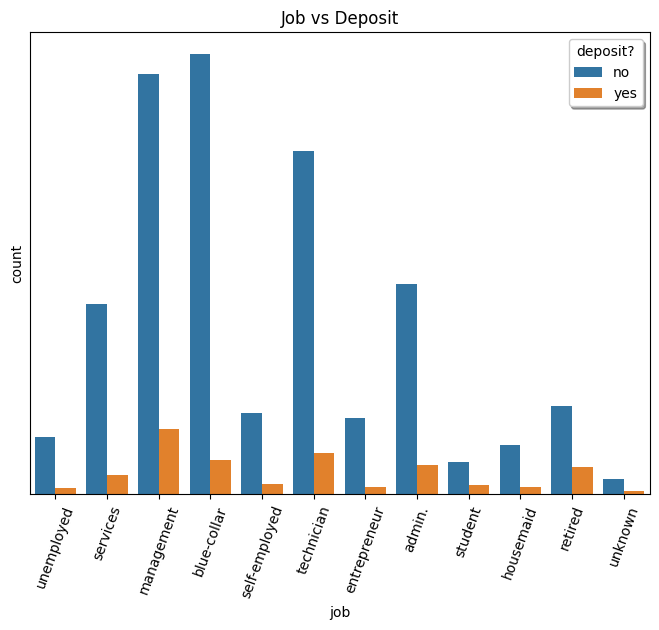

In [ ]:
plt.figure(figsize=(8, 6));
plt.title('Job vs Deposit')
g = sns.countplot(x= 'job', hue = 'y', data=data)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)
plt.show()

In [ ]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

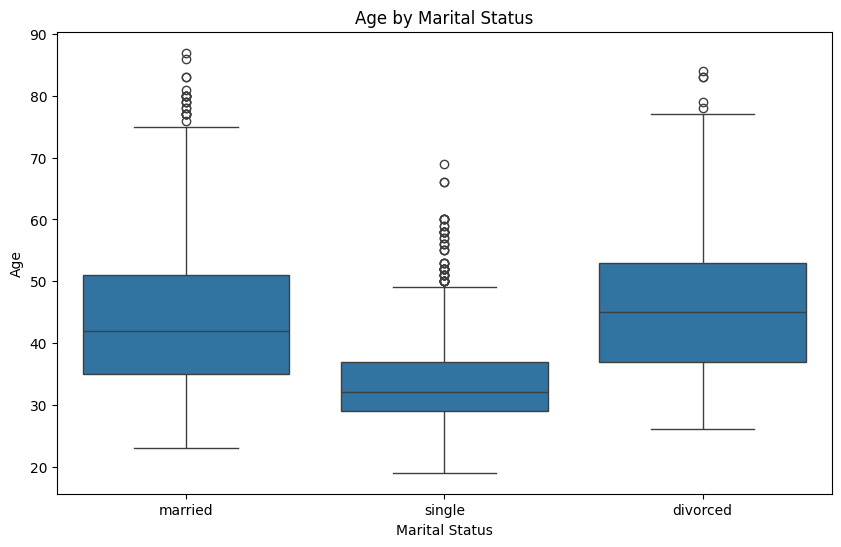

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='marital', y='age')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Age by Marital Status')
plt.show()

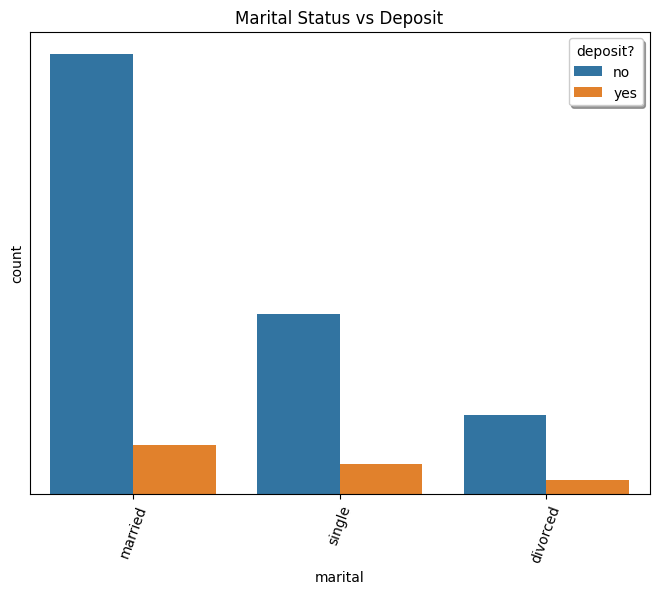

In [ ]:
plt.figure(figsize=(8, 6));
plt.title('Marital Status vs Deposit')
g = sns.countplot(x= 'marital', hue = 'y', data=data)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)
plt.show()

In [ ]:
data['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

<ipython-input-18-c9a3d96534a6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='education', y='balance', estimator=np.median, ci=None, palette='Set2')
<ipython-input-18-c9a3d96534a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='education', y='balance', estimator=np.median, ci=None, palette='Set2')


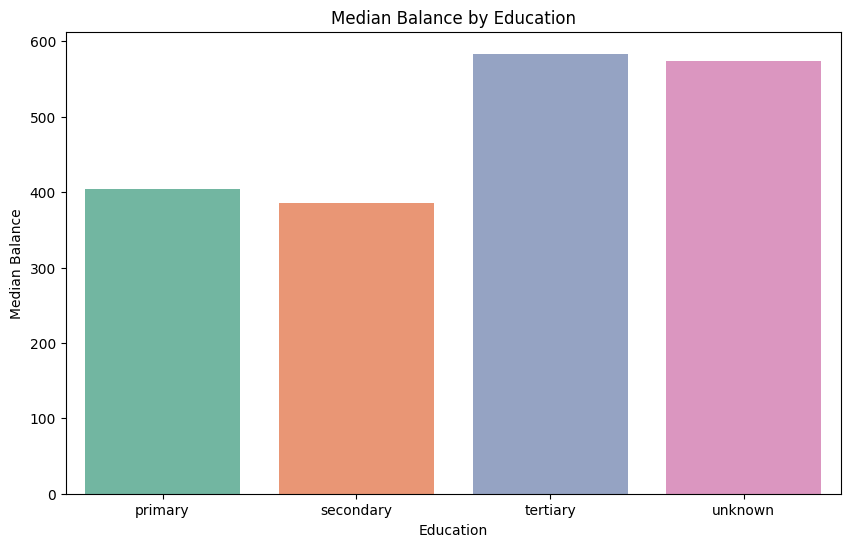

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='education', y='balance', estimator=np.median, ci=None, palette='Set2')
plt.xlabel('Education')
plt.ylabel('Median Balance')
plt.title('Median Balance by Education')
plt.show()

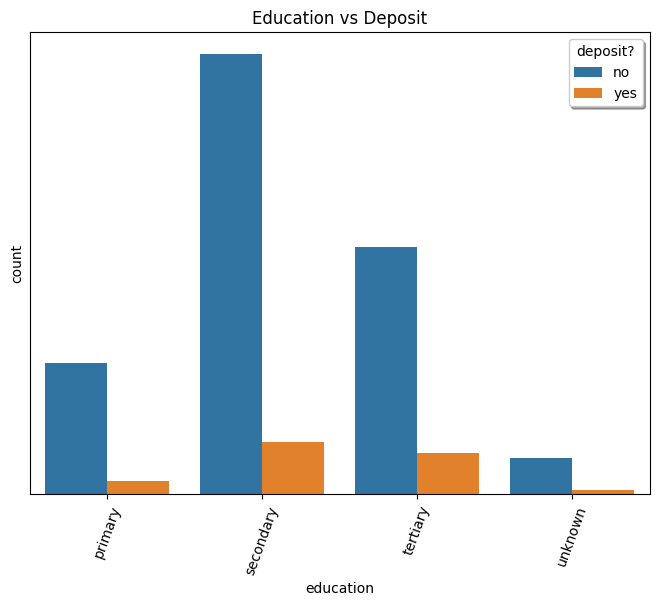

In [ ]:
plt.figure(figsize=(8, 6));
plt.title('Education vs Deposit')
g = sns.countplot(x= 'education', hue = 'y', data=data)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)
plt.show()

Text(0.5, 1.0, 'People have a loan or not')

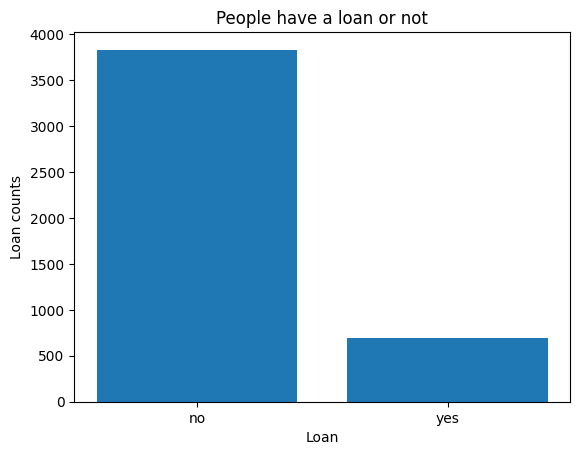

In [ ]:
counts_loan=data["loan"].value_counts()
plt.bar(['no','yes'] ,counts_loan)
plt.xlabel("Loan")
plt.ylabel("Loan counts")
plt.title("People have a loan or not")

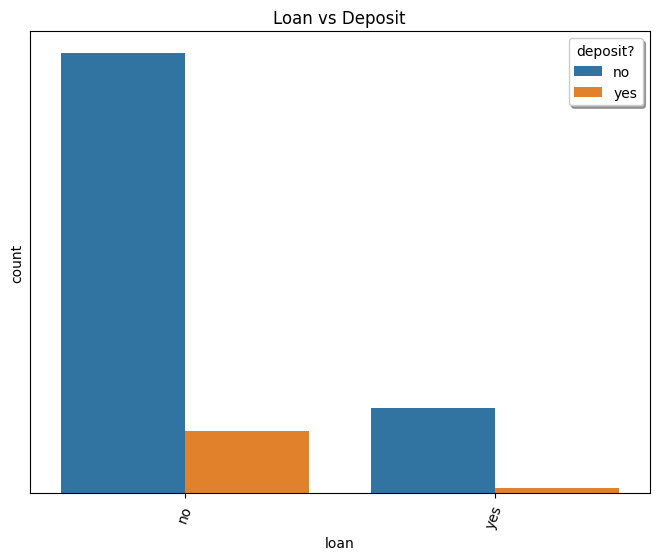

In [ ]:
plt.figure(figsize=(8, 6));
plt.title('Loan vs Deposit')
g = sns.countplot(x= 'loan', hue = 'y', data=data)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)
plt.show()

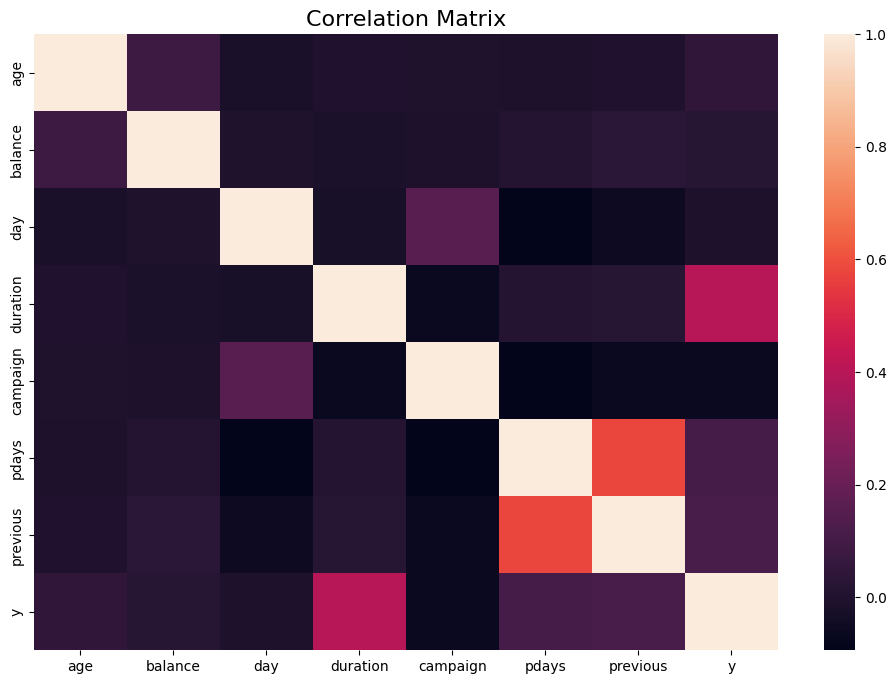

In [ ]:
df=data.copy()
fig = plt.figure(figsize=(12,8))
df['y'] = LabelEncoder().fit_transform(df['y'])
numeric_df = df.select_dtypes(exclude="object")
corr= numeric_df.corr()
sns.heatmap(corr, cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

## **Separating Categorical and numeric data and Converting categoric data into numeric data**

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns].head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no


In [ ]:
numerical_columns = data.select_dtypes(exclude=['object']).columns
data[numerical_columns].head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [ ]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.056270,10,1,0,0,0.121072,0,0,0,0.374052,10,-0.711861,-0.576829,-0.407218,-0.320413,3,0
1,-0.772583,7,1,1,0,1.118644,1,1,0,-0.596026,8,-0.169194,-0.576829,2.989044,2.041734,0,0
2,-0.583458,4,2,2,0,-0.024144,1,0,0,0.010273,0,-0.303898,-0.576829,2.899143,0.270124,0,0
3,-1.056270,4,1,2,0,0.017726,1,1,2,-1.566105,6,-0.250017,0.387967,-0.407218,-0.320413,3,0
4,1.686036,1,1,1,0,-0.472753,1,0,2,-1.323585,8,-0.146102,-0.576829,-0.407218,-0.320413,3,0


# **Decision Tree Classifier**

In [ ]:
X = data.drop(columns=['y'])
y = data['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(3616, 16)

In [ ]:
X_test.shape

(905, 16)

In [ ]:
y_test

2398    0
800     0
2288    0
2344    0
3615    0
       ..
3589    1
3128    0
3259    0
4239    0
2233    1
Name: y, Length: 905, dtype: int64

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dtc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8729281767955801


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.69       905
weighted avg       0.88      0.87      0.88       905



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[744  63]
 [ 52  46]]


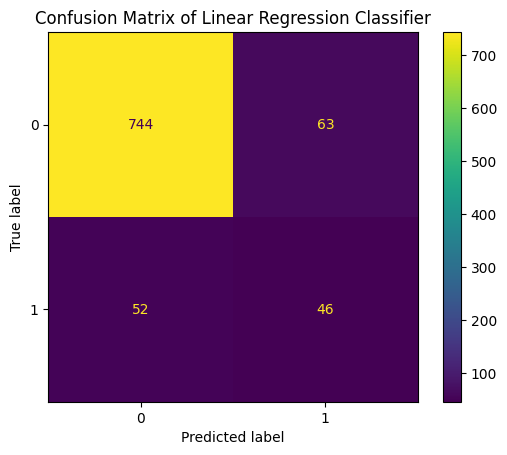

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['0','1'])
cm_display.plot()
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()

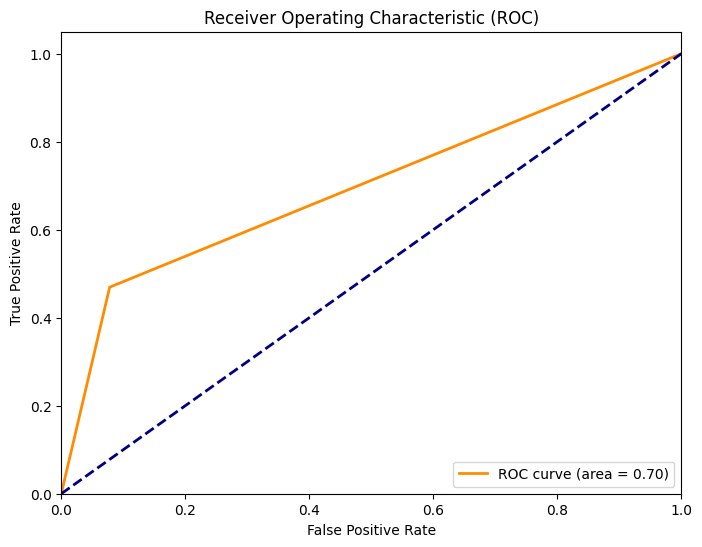

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()